In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from  sklearn.metrics import roc_auc_score, roc_curve
import scikitplot as skplt

%matplotlib notebook

In [2]:
data = pd.read_excel("Telecom_Churn.xlsx")

In [3]:
data.info() # As we can see there are no non-objects in the data
            # 3333 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [4]:
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
data.var()==0 # No variable with variance = 0 => we may keep all of them

Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Churn             False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
Area Code         False
dtype: bool

In [6]:
data.nunique()

Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan           2
VMail Plan           2
Day Calls          119
Day Charge        1667
Eve Calls          123
Eve Charge        1440
Night Calls        120
Night Charge       933
Intl Calls          21
Intl Charge        162
State               51
Area Code            3
Phone             3333
dtype: int64

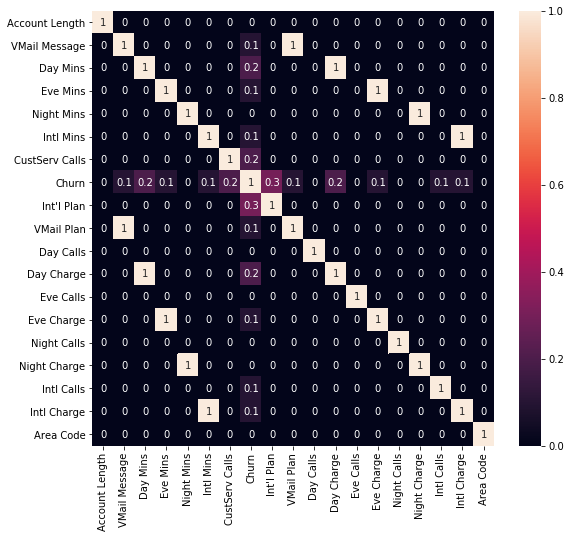

In [7]:
plt.subplots(figsize=(9,8))
sns.heatmap(data.corr().abs().round(1),annot=True)

In [8]:
# Get rid of the variables having 1 correlation
# Also get rid of the phone variable as it is unique and doesn't provide any insight
# But keep the state (also object variable)
data.drop(["VMail Message", "Day Mins", "Eve Mins", "Intl Mins", "Night Mins","Phone"],axis=1, inplace = True)

In [9]:
# Convert state to dummy
data = pd.get_dummies(data, drop_first=True)

In [10]:
data.shape

(3333, 64)

In [11]:
X = data.drop("Churn", axis=1)
Y = data.Churn

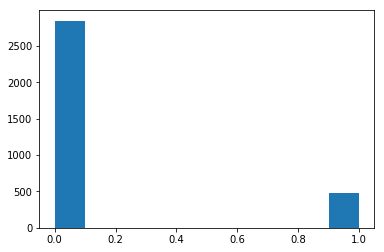

In [12]:
plt.figure()
_ = plt.hist(Y)

In [13]:
# As we can see there is some class imbalance

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

## Decision tree

In [15]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
print("Accuracy_Train:",tree.score(x_train,y_train)*100)
print("Accuracy_Test:",tree.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree.predict(x_test))*100)

Accuracy_Train: 100.0
Accuracy_Test: 92.5
ROC AUC Train: 100.0
ROC AUC Test: 83.97197901281915


In [17]:
# Huge overfitting => lets prune the model while training

In [18]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
print("Accuracy_Train:",tree.score(x_train,y_train)*100)
print("Accuracy_Test:",tree.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree.predict(x_test))*100)
# Much better

Accuracy_Train: 95.1993141877411
Accuracy_Test: 93.4
ROC AUC Train: 85.48094802396623
ROC AUC Test: 81.58399360266338


In [20]:
print("Train:",classification_report(y_test,tree.predict(x_test)))

Train:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.85      0.65      0.74       143

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.93      0.93      0.93      1000



In [21]:
FPR,TPR,thresholds=roc_curve(y_test,tree.predict_proba(x_test)[:,1])

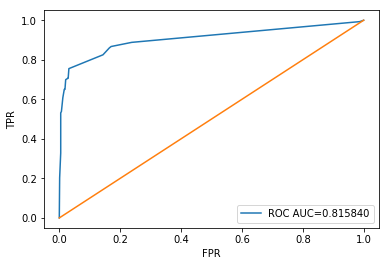

In [22]:
plt.figure()
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,tree.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [23]:
# false positive rate vs true positive rate
# AUC close to 1 => good (1=perfect)

In [24]:
feature_imp=pd.DataFrame(tree.feature_importances_,index=X.columns,columns=["Feature Importances"])
feature_imp.sort_values(by="Feature Importances",ascending=False)

,Feature Importances
Day Charge,0.300535
CustServ Calls,0.158061
Eve Charge,0.122278
Intl Charge,0.119492
Int'l Plan,0.117369
Intl Calls,0.084952
VMail Plan,0.060009
Night Charge,0.017957
Night Calls,0.006695
Day Calls,0.004826


In [25]:
# As we can see almost all the variables are not significant.
# Most of the decisions are made with ~10 variables

In [26]:
tree_gr=export_graphviz(tree,out_file="tree.txt", max_depth=5, class_names=True, feature_names=X.columns, filled=True)
with open('tree.txt', 'r') as f:
    print(f.read())

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Day Charge <= 44.805\ngini = 0.249\nsamples = 2333\nvalue = [1993, 340]\nclass = y[0]", fillcolor="#e58139d3"] ;
1 [label="CustServ Calls <= 3.5\ngini = 0.204\nsamples = 2174\nvalue = [1923, 251]\nclass = y[0]", fillcolor="#e58139de"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Int'l Plan <= 0.5\ngini = 0.15\nsamples = 2000\nvalue = [1837, 163]\nclass = y[0]", fillcolor="#e58139e8"] ;
1 -> 2 ;
3 [label="Day Charge <= 37.95\ngini = 0.096\nsamples = 1822\nvalue = [1730, 92]\nclass = y[0]", fillcolor="#e58139f1"] ;
2 -> 3 ;
4 [label="Eve Charge <= 29.0\ngini = 0.056\nsamples = 1563\nvalue = [1518, 45]\nclass = y[0]", fillcolor="#e58139f7"] ;
3 -> 4 ;
5 [label="gini = 0.054\nsamples = 1557\nvalue = [1514, 43]\nclass = y[0]", fillcolor="#e58139f8"] ;
4 -> 5 ;
6 [label="gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = y[0]", fillcolor="#e581397f"] ;
4 -> 6 ;
7 [label="Eve Charge <= 22.6

## Gain & Lift

/Users/martin/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


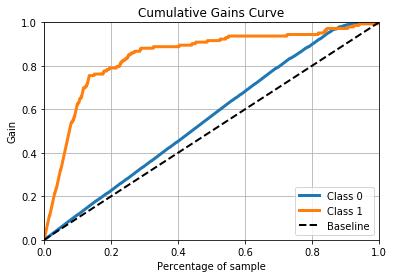

In [27]:
skplt.metrics.plot_cumulative_gain(y_test,tree.predict_proba(x_test))

/Users/martin/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


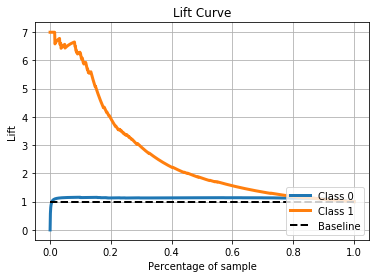

In [28]:
skplt.metrics.plot_lift_curve(y_test,tree.predict_proba(x_test))